Testing Cameras

Text(0.5, 1.0, 'Right')

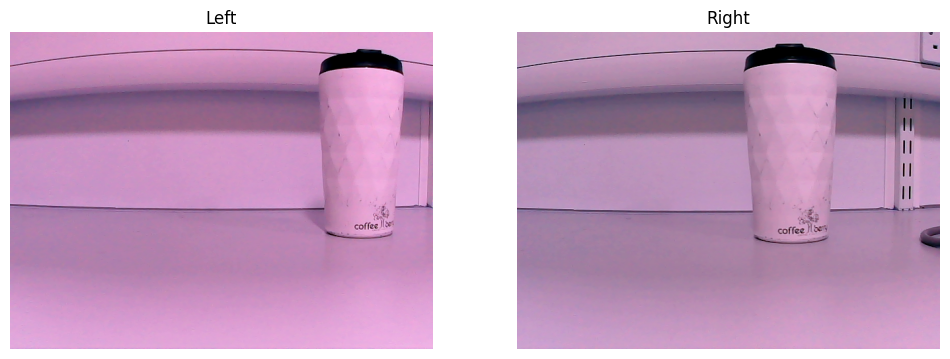

In [3]:
import cv2
from matplotlib import pyplot as plt
import time

# time. sleep(5)  
cam1 = cv2.VideoCapture(0, cv2.CAP_DSHOW) 
cam2 = cv2.VideoCapture(1, cv2.CAP_DSHOW) 
  
result1, l_img = cam1.read()
result2, r_img = cam2.read() 

cam1.release()
cam2.release()

cv2.imwrite("left.png", l_img)
cv2.imwrite("right.png", r_img)

fig = plt.figure(figsize=(12, 5)) 

fig.add_subplot(1, 2, 1) 
plt.imshow(l_img) 
plt.axis('off')
plt.title("Left") 

fig.add_subplot(1, 2, 2) 
plt.imshow(r_img) 
plt.axis('off')
plt.title("Right") 

Capture Images fro Calibration

In [17]:
import cv2
import os

num_images = 1000

# left_folder = 'left_calibration'
right_folder = 'right_calibration'

# os.makedirs(left_folder, exist_ok=True)
os.makedirs(right_folder, exist_ok=True)

# cam1 = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cam2 = cv2.VideoCapture(1, cv2.CAP_DSHOW)


cv2.namedWindow('Calibration Images', cv2.WINDOW_NORMAL)

for i in range(num_images):
    # Read frames from both webcams
    # ret1, frame1 = cam1.read()
    ret2, frame2 = cam2.read()

    # Display frames
    # cv2.imshow('Calibration Images', cv2.hconcat([frame1, frame2]))
    # cv2.imshow('Calibration Left Images', cv2.hconcat([frame1]))
    cv2.imshow('Calibration Right Images', cv2.hconcat([frame2]))


    # Save frames to folders when a key is pressed
    key = cv2.waitKey(0) & 0xFF
    if key == 27: 
        break
    elif key == 32: 
        # cv2.imwrite(os.path.join(left_folder, f'img_{i+1}.png'), frame1)
        cv2.imwrite(os.path.join(right_folder, f'img_{i+1}.png'), frame2)
        print(f"Image {i+1} captured and saved.")

# Release resources
# cam1.release()
cam2.release()
cv2.destroyAllWindows()


Image 1 captured and saved.
Image 2 captured and saved.
Image 3 captured and saved.
Image 4 captured and saved.
Image 5 captured and saved.
Image 6 captured and saved.
Image 7 captured and saved.
Image 8 captured and saved.
Image 9 captured and saved.
Image 10 captured and saved.
Image 11 captured and saved.
Image 12 captured and saved.
Image 13 captured and saved.
Image 14 captured and saved.
Image 15 captured and saved.
Image 16 captured and saved.
Image 17 captured and saved.
Image 18 captured and saved.
Image 19 captured and saved.
Image 20 captured and saved.
Image 21 captured and saved.
Image 22 captured and saved.
Image 23 captured and saved.
Image 24 captured and saved.
Image 25 captured and saved.
Image 26 captured and saved.
Image 27 captured and saved.
Image 28 captured and saved.
Image 29 captured and saved.
Image 30 captured and saved.
Image 31 captured and saved.
Image 32 captured and saved.
Image 33 captured and saved.
Image 34 captured and saved.
Image 35 captured and s

Extract Camera 1 Matrix

In [15]:
import numpy as np
import cv2
import glob
import os
from matplotlib import pyplot as plt

# termination criteria
criteriaL = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objpL = np.zeros((9*6,3), np.float32)
objpL[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpointsL = [] # 3d point in real world space
imgpointsL = [] # 2d points in image plane.
imagesL = glob.glob('./left_calibration/*.png')

i = 0
for fnameL in imagesL:
    i = i + 1
    imgL = cv2.imread(fnameL)
    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    retL, cornersL = cv2.findChessboardCorners(grayL, (9,6), None)
    # If found, add object points, image points (after refining them)
    if retL == True:
        objpointsL.append(objpL)
        corners2L = cv2.cornerSubPix(grayL,cornersL, (11,11), (-1,-1), criteriaL)
        imgpointsL.append(corners2L)
        # Draw and display the corners
        cv2.drawChessboardCorners(imgL, (9,6), corners2L, retL)

    folder_nameL = "Detected_Checkerboard_Left_Camera"
    if not os.path.exists(folder_nameL):
        os.makedirs(folder_nameL)
    
    image_pathL = os.path.join(folder_nameL, f"image_{i}.png")
    cv2.imwrite(image_pathL, imgL)

retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpointsL, imgpointsL, grayL.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtxL)

Camera matrix : 

[[611.27796488   0.         321.91416273]
 [  0.         577.19106622 326.99160325]
 [  0.           0.           1.        ]]


Extract Camera 2 Matrix

In [18]:
# termination criteria
criteriaR = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objpR = np.zeros((9*6,3), np.float32)
objpR[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpointsR = [] # 3d point in real world space
imgpointsR = [] # 2d points in image plane.
imagesR = glob.glob('./right_calibration/*.png')

i = 0
for fnameR in imagesR:
    i = i + 1
    imgR = cv2.imread(fnameR)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    retR, cornersR = cv2.findChessboardCorners(grayR, (9,6), None)
    # If found, add object points, image points (after refining them)
    if retR == True:
        objpointsR.append(objpR)
        corners2R = cv2.cornerSubPix(grayR,cornersR, (11,11), (-1,-1), criteriaR)
        imgpointsR.append(corners2R)
        # Draw and display the corners
        cv2.drawChessboardCorners(imgR, (9,6), corners2R, retR)

    folder_nameR = "Detected_Checkerboard_Right_Camera"
    if not os.path.exists(folder_nameR):
        os.makedirs(folder_nameR)
    
    image_pathR = os.path.join(folder_nameR, f"image_{i}.png")
    cv2.imwrite(image_pathR, imgR)


retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpointsR, imgpointsR, grayR.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtxR)

Camera matrix : 

[[596.50259605   0.         320.0962242 ]
 [  0.         577.77649293 292.49236523]
 [  0.           0.           1.        ]]


Calibration & Rectification

In [ ]:
import numpy as np
import cv2
import glob

# Calibrate cameras
# retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpointsL, imgpointsL, grayL.shape[::-1], None, None)
# retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpointsL, imgpointsR, grayR.shape[::-1], None, None)

# Calibrating left camera
hL,wL= grayL.shape[:2]
new_mtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))
# 
# Calibrating right camera
hR,wR= grayL.shape[:2]
new_mtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

# Stereo calibration
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC

ret_stereo, _, _, _, _, R, T, E, F = cv2.stereoCalibrate(objpointsL, imgpointsL, imgpointsR, mtxL, distL, mtxR, distR, grayL.shape[::-1], criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 1e-5), flags=flags)

# Rectification
R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(mtxL, distL, mtxR, distR, grayL.shape[::-1], R, T)

# Map for rectification
left_maps = cv2.initUndistortRectifyMap(mtxL, distL, R1, P1, grayL.shape[::-1], cv2.CV_16SC2)
right_maps = cv2.initUndistortRectifyMap(mtxR, distR, R2, P2, grayR.shape[::-1], cv2.CV_16SC2)

cv2_file = cv2.FileStorage('stereoMap.xml', cv2.FILE_STORAGE_WRITE)

cv2_file.write('stereoMapL_x',left_maps[0])
cv2_file.write('stereoMapL_y',left_maps[1])
cv2_file.write('stereoMapR_x',right_maps[0])
cv2_file.write('stereoMapR_y',right_maps[1])

cv2_file.release()

Open camera parameters xml file (Raheel)

In [2]:
import cv2

# Camera parameters to undistort and rectify images
cv_file = cv2.FileStorage()
cv_file.open('stereoMap.xml', cv2.FileStorage_READ)

left_maps_x = cv_file.getNode('stereoMapL_x').mat()
left_maps_y = cv_file.getNode('stereoMapL_y').mat()
left_maps_x = cv_file.getNode('stereoMapR_x').mat()
left_maps_y = cv_file.getNode('stereoMapR_y').mat()

Undistort and Rectify Images (Raheel)

In [11]:
import cv2
import numpy as np

# Load stereo images
img_left = cv2.imread("left.png")
img_right = cv2.imread("right.png")

# Rectify stereo images using the rectification maps
rectified_left = cv2.remap(img_left, left_maps_x, left_maps_y, cv2.INTER_LINEAR)
rectified_right = cv2.remap(img_right, left_maps_x, left_maps_y, cv2.INTER_LINEAR)

cv2.imwrite("rectified_left3.png", rectified_left)
cv2.imwrite("rectified_right3.png", rectified_right)


True

Disparity Map Extraction (Raheel)

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def stereo_fusion(left_image, right_image):
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

    # stereo = cv2.StereoBM_create(numDisparities=128, blockSize=11)
    stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*4,  # Adjust as needed
    blockSize=5,
    P1=8*3*15**2,  # Adjust as needed
    P2=32*3*15**2,  # Adjust as needed
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2
)


    disparity = stereo.compute(left_gray, right_gray).astype(np.float32)/16

    # Normalize and apply a color map
    disparity = cv2.normalize(src=disparity, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    disparity = cv2.applyColorMap(disparity, cv2.COLORMAP_JET)

    # Normalize the image for representation
    # min = disparity.min()
    # max = disparity.max()
    # disparity = np.uint8(255 * (disparity - min) / (max - min))
    # disparity = cv2.normalize(disparity_map, disparity_map, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    return disparity

left_image = cv2.imread('left.png')
right_image = cv2.imread('right.png')
result_image1 = stereo_fusion(left_image, right_image)

# left_image = cv2.imread('rectified_left.png')
# right_image = cv2.imread('rectified_right.png')
# result_image2 = stereo_fusion(left_image, right_image)

cv2.imwrite("disparity_map_before.png", result_image1)
# cv2.imwrite("disparity_map_after.png", result_image2)

cv2.imshow("Before", result_image1)
# cv2.imshow("After", result_image2)
cv2.waitKey(0)


-1

Trying other disparity methods

In [43]:
import numpy as np
import cv2

def stereo_fusion_depth(left_image, right_image, focal_length, baseline_distance):
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=5)

    disparity = stereo.compute(left_gray, right_gray).astype(np.float32)
    disparity = (disparity/16.0 - minDisparity)/numDisparities
    # Convert disparity to depth
    depth_map = (focal_length * baseline_distance) / disparity

    # Optionally, you can apply some normalization to the depth map if needed
    # min_depth = depth_map.min()
    # max_depth = depth_map.max()
    # depth_map = np.uint8(255 * (depth_map - min_depth) / (max_depth - min_depth))

    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_JET)

    return depth_map

left_image = cv2.imread('left.png')
right_image = cv2.imread('right.png')
result_image1 = stereo_fusion_depth(left_image, right_image, 0.5, 0.075)

# left_image = cv2.imread('rectified_left.png')
# right_image = cv2.imread('rectified_right.png')
# result_image2 = stereo_fusion_depth(left_image, right_image, 0.5, 0.075)

cv2.imwrite("depth_map_before.png", result_image1)
# cv2.imwrite("depth_map_after.png", result_image2)

cv2.imshow("Before", result_image1)
# cv2.imshow("After", result_image2)
cv2.waitKey(0)


NameError: name 'minDisparity' is not defined

In [5]:
# import numpy as np
# import cv2
# import glob

# frameSize = (640,480)

# # Calibrate cameras
# retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpointsL, imgpointsL, frameSize, None, None)
# retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpointsL, imgpointsR, frameSize, None, None)

# # Calibrating left camera
# hL,wL,cL = imgL.shape
# new_mtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

# # Calibrating right camera
# hR,wR,cR = imgL.shape
# new_mtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

# # Stereo calibration
# flags = 0
# flags |= cv2.CALIB_FIX_INTRINSIC

# criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# retStereo, newCameraMatrixL, distL, newCameraMatrixR, distR, rot, trans, essentialMatrix, fundamentalMatrix = cv2.stereoCalibrate(objpointsL, imgpointsL, imgpointsR, new_mtxL, distL, new_mtxR, distR, grayL.shape[::-1], criteria_stereo, flags)


# # Rectification
# rectifyScale= 1
# rectL, rectR, projMatrixL, projMatrixR, Q, roi_L, roi_R= cv2.stereoRectify(newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], rot, trans, rectifyScale,(0,0))

# left_maps = cv2.initUndistortRectifyMap(newCameraMatrixL, distL, rectL, projMatrixL, grayL.shape[::-1], cv2.CV_16SC2)
# right_maps = cv2.initUndistortRectifyMap(newCameraMatrixR, distR, rectR, projMatrixR, grayR.shape[::-1], cv2.CV_16SC2)

# print("Saving parameters!")
# cv2_file = cv2.FileStorage('stereoMap_nicon.xml', cv2.FILE_STORAGE_WRITE)

# cv2_file.write('stereoMapL_x',left_maps[0])
# cv2_file.write('stereoMapL_y',left_maps[1])
# cv2_file.write('stereoMapR_x',right_maps[0])
# cv2_file.write('stereoMapR_y',right_maps[1])

# cv2_file.release()

Saving parameters!
